
-----

# 📘 ML Project - Week 3: Model Creation, Evaluation & Tuning
-----

## 1\. Setup & Data Preparation
**Q1:** Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


**Q2:** Load the  dataset and display the first 5 rows.

In [7]:
df = pd.read_csv('cardio_cleaned.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bmi_cat
0,0,-0.434128,2,0.451939,-0.847811,-0.991706,-0.141638,1,1,0,0,1,0,-0.427806,-1.038632,2
1,1,0.309391,1,-1.053727,0.761122,0.799134,0.899664,3,1,0,0,1,1,0.312150,1.409052,4
2,2,-0.246121,1,0.075523,-0.707904,0.202187,-1.182941,3,1,0,0,0,1,-0.250216,-0.747781,2
3,3,-0.746123,2,0.577412,0.551261,1.396080,1.940966,1,1,0,0,1,1,-0.753386,0.234315,3
4,4,-0.806496,1,-1.053727,-1.267533,-1.588653,-2.224243,1,1,0,0,0,0,-0.812583,-0.842213,2


**Q3:** Separate the dataset into Features (`X`) and Target (`y`).

In [8]:
X = df.drop(['cardio','age','bmi_cat'], axis=1)
y = df['cardio']

-----

## 2\. Train-Test Split (Step 1)
**Q4:** Split the dataset into Training(80%) and Testing (20%) .

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")

Training Shape: (54986, 13)
Testing Shape:  (13747, 13)


-----

## 3\. Normalization 

**Q6:** Scale the data:

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled Successfully.")

Data Scaled Successfully.


-----

## 4\. Model Training 
**Q8:** Initialize the **Logistic Regression**.

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()


**Q9:** Train (fit) the model using the **Scaled Training Data**.

In [20]:
model.fit(X_train_scaled, y_train)
print("Model Trained.")

Model Trained.


-----

## 5. Evaluation 

**Q10:** predictions on the **Scaled Test Set** (`X_test_scaled`).

In [21]:
y_pred = model.predict(X_test_scaled)

**Q11:** Calculate the **Accuracy Score**.

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7218302175020004


**Q12:** Display the **Confusion Matrix** using a Heatmap.


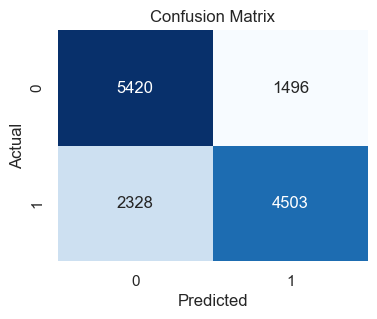

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Q13:** Print the full **Classification Report** (Precision, Recall, F1-Score).

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6916
           1       0.75      0.66      0.70      6831

    accuracy                           0.72     13747
   macro avg       0.73      0.72      0.72     13747
weighted avg       0.72      0.72      0.72     13747



-----

## 6. Overfitting & Underfitting Check 

**Q14:** check Overfitting

In [29]:
y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")



Training Accuracy: 72.83%
Testing Accuracy:  72.18%
